# 常用的 DataFrame 操作
* merge / transform
* subset
* groupby

# [作業目標]
- 練習填入對應的欄位資料或公式, 完成題目的要求 

# [作業重點]
- 填入適當的輸入資料, 讓後面的程式顯示題目要求的結果 (Hint: 填入對應區間或欄位即可, In[4]~In[6], Out[4]~In[6])
- 填入z轉換的計算方式, 完成轉換後的數值 (Hint: 參照標準化公式, In[7])

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# 設定 data_path
dir_data = './data/'

In [3]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: ./data/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## 作業
1. 請將 app_train 中的 CNT_CHILDREN 依照下列規則分為四組，並將其結果在原本的 dataframe 命名為 CNT_CHILDREN_GROUP
    * 0 個小孩
    * 有 1 - 2 個小孩
    * 有 3 - 5 個小孩
    * 有超過 5 個小孩

2. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，列出各組的平均 AMT_INCOME_TOTAL，並繪製 boxplot
3. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，對 AMT_INCOME_TOTAL 計算 [Z 轉換](https://en.wikipedia.org/wiki/Standard_score) 後的分數

In [22]:
#1
"""
Your code here
"""
cut_rule = [0, 1, 3, 6, np.inf]

app_train['CNT_CHILDREN_GROUP'] = pd.cut(app_train['CNT_CHILDREN'].values, cut_rule, right=False)
app_train['CNT_CHILDREN_GROUP'].value_counts()

[0.0, 1.0)    215371
[1.0, 3.0)     87868
[3.0, 6.0)      4230
[6.0, inf)        42
Name: CNT_CHILDREN_GROUP, dtype: int64

In [23]:
#2-1
"""
Your code here
"""
grp = ['CNT_CHILDREN_GROUP', 'TARGET']

grouped_df = app_train.groupby(grp)['AMT_INCOME_TOTAL']
grouped_df.mean()

CNT_CHILDREN_GROUP  TARGET
[0.0, 1.0)          0         166747.010980
                    1         160804.210548
[1.0, 3.0)          0         174590.584401
                    1         176115.362720
[3.0, 6.0)          0         175053.742913
                    1         160677.385714
[6.0, inf)          0         139159.090909
                    1         180000.000000
Name: AMT_INCOME_TOTAL, dtype: float64

In [32]:
app_train.groupby(grp)['AMT_INCOME_TOTAL'].describe()

count           mean           std      min  \
CNT_CHILDREN_GROUP TARGET                                                   
[0.0, 1.0)         0       198762.0  166747.010980  1.061799e+05  25650.0   
                   1        16609.0  160804.210548  8.483011e+04  25650.0   
[1.0, 3.0)         0        80081.0  174590.584401  1.201981e+05  26550.0   
                   1         7787.0  176115.362720  1.327159e+06  27900.0   
[3.0, 6.0)         0         3810.0  175053.742913  1.128427e+05  29250.0   
                   1          420.0  160677.385714  1.130315e+05  36000.0   
[6.0, inf)         0           33.0  139159.090909  7.112483e+04  45000.0   
                   1            9.0  180000.000000  7.377118e+04  90000.0   

                                25%       50%       75%          max  
CNT_CHILDREN_GROUP TARGET                                             
[0.0, 1.0)         0       112500.0  144000.0  202500.0   13500000.0  
                   1       112500.0  135000.0  202500.0    1890000.0  
[1.0, 3.0)         0       112500.0  157500.0  211500.0   18000090.0  
                   1       112500.0  135000.0  202500.0  117000000.0  
[3.0, 6.0)         0       112500.0  157500.0  202500.0    2250000.0  
                   1        96750.0  135000.0  185625.0    1350000.0  
[6.0, inf)         0        90000.0  112500.0  180000.0     337500.0  
                   1       135000.0  180000.0  202500.0     315000.0

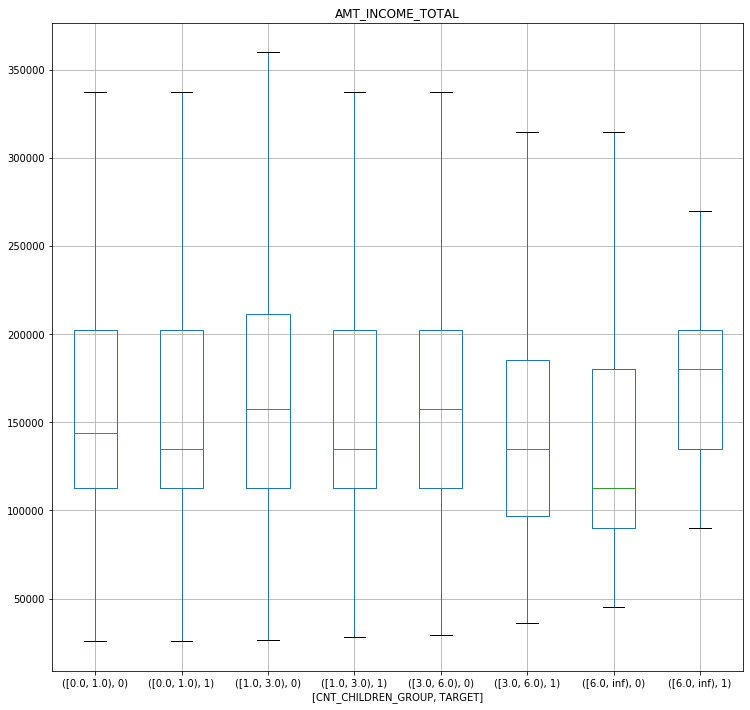

In [31]:
#2-2
"""
Your code here
"""
plt_column = 'AMT_INCOME_TOTAL'
plt_by = ['CNT_CHILDREN_GROUP', 'TARGET']

app_train.boxplot(column=plt_column, by = plt_by, showfliers=False, figsize=(12,12))
plt.suptitle('')
plt.show()

In [41]:
grouped_df.apply(lambda x: print(x.shape))

(198762,)
(16609,)
(80081,)
(7787,)
(3810,)
(420,)
(33,)
(9,)


CNT_CHILDREN_GROUP  TARGET
[0.0, 1.0)          0         None
                    1         None
[1.0, 3.0)          0         None
                    1         None
[3.0, 6.0)          0         None
                    1         None
[6.0, inf)          0         None
                    1         None
Name: AMT_INCOME_TOTAL, dtype: object

In [43]:
#3
"""
Your code here
"""
app_train['AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET'] = grouped_df.apply(lambda x: (x - x.mean()) / x.std())

app_train[['AMT_INCOME_TOTAL','AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET']].head()

,AMT_INCOME_TOTAL,AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET
0,202500.0,0.491521
1,270000.0,0.972434
2,67500.0,-0.934706
3,135000.0,-0.298993
4,121500.0,-0.426135


# 補充
### pandas的cut&qcut函數 ([Reference](https://medium.com/@morris_tai/pandas%E7%9A%84cut-qcut%E5%87%BD%E6%95%B8-93c244e34cfc))

如果我們今天有一些連續性的數值，可以使用cut&qcut進行離散化
cut 函数是利用數值區間將數值分類，qcut 則是用分位數。
換句話說，cut 用在長度相等的類別，qcut 用在大小相等的類別。

##### cut

In [10]:
# 假設我們有一些人的年齡
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32, 101]

# 我們如果想要離散化這些數列，分成“18到25”、“25到35”、“35到60”以及“60以上”，可以使用cut函數
bins = [18, 25, 35, 60, 100]
cats = pd.cut(ages, bins, )
cats

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (60.0, 100.0], (35.0, 60.0], (35.0, 60.0], (25.0, 35.0], NaN]
Length: 13
Categories (4, interval[int64]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

##### qcut

In [14]:
data = np.random.randn(1000) #高斯分佈
cats = pd.qcut(data, 4) #按四分位數分類，也可以用[0, .25, .5, .75, 1.]
cats

[(-3.987, -0.616], (-0.616, 0.00919], (-3.987, -0.616], (-0.616, 0.00919], (-0.616, 0.00919], ..., (-3.987, -0.616], (0.00919, 0.646], (0.646, 3.291], (-0.616, 0.00919], (0.00919, 0.646]]
Length: 1000
Categories (4, interval[float64]): [(-3.987, -0.616] < (-0.616, 0.00919] < (0.00919, 0.646] < (0.646, 3.291]]

會發現qcut把所有數值平均分配了，當然如果不想用四分位的話還可以自行輸入list，只要範圍介在0~1，例如[0, 0.1, 0.5, 0.9, 1.]